# Rozdział 11. Równania różniczkowe cząstkowe

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import mpl_toolkits.mplot3d

import scipy.sparse as sp

import scipy.sparse.linalg

import scipy.linalg as la

## Metoda różnic skończonych

### Przykład jednowymiarowy

Równanie przewodnictwa cieplnego: 
$$-5 = u_{xx}$$
Warunki brzegowe:
$$u(x=0) = 1, u(x=1) = 2$$
Przybliżenie drugiej pochodnej:
$$
u_{xx}[n] \approx \frac{u[n-1] - 2u[n] + u[n+1]}{\Delta x^2}
$$

In [13]:
N = 7

u0 = 1
u1 = 2

dx = 1.0 / (N + 1)

A = (np.eye(N, k=-1) - 2 * np.eye(N) + np.eye(N, k=1)) / dx**2
A

array([[-128.,   64.,    0.,    0.,    0.,    0.,    0.],
       [  64., -128.,   64.,    0.,    0.,    0.,    0.],
       [   0.,   64., -128.,   64.,    0.,    0.,    0.],
       [   0.,    0.,   64., -128.,   64.,    0.,    0.],
       [   0.,    0.,    0.,   64., -128.,   64.,    0.],
       [   0.,    0.,    0.,    0.,   64., -128.,   64.],
       [   0.,    0.,    0.,    0.,    0.,   64., -128.]])

In [14]:
d = -5 * np.ones(N)
d[0] -= u0 / dx**2
d[N-1] -= u1 / dx**2

u = np.linalg.solve(A, d)

x = np.linspace(0, 1, N+2)
U = np.hstack([[u0], u, [u1]])

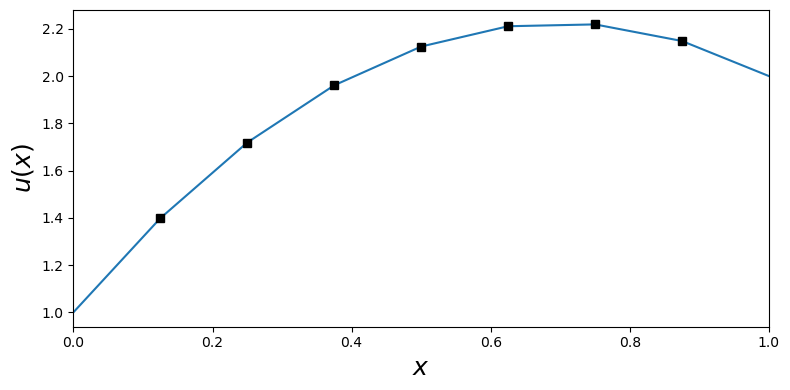

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, U)
ax.plot(x[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
fig.tight_layout();

### Przykład dwuwymiarowy

Równanie Laplace'a: 
$$u_{xx} + u_{yy} = 0$$

Warunki brzegowe:
$$
u(x=0) = u(x=1) = u(y = 0) = u(y = 1) = 10
$$

Przybliżenia pochodnych:
$$
u_{xx}[m, n] \approx \frac{u[m-1, n] - 2u[m,n] + u[m+1,n]}{dx^2}
$$
$$
u_{yy}[m, n] \approx \frac{u[m, n-1] - 2u[m,n] + u[m,n+1]}{dy^2}
$$

Ostateczna postać:

$
0 =
\frac{u[m + N, n -1] - 2u[m + N, n] + u[m + N, n + 1]}{dx^2}
+
\frac{u[m + N, n -N)] - 2u[m + N, n] + u[m + N, n + N])}{dy^2}
$

In [25]:
N = 100

In [26]:
u0_t, u0_b = 5, -5

In [27]:
u0_l, u0_r = 3, -1

In [28]:
dx = 1. / (N+1)

In [29]:
A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N))/dx**2

In [30]:
A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2, k=N))/dx**2

In [31]:
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [32]:
A.nnz * 1.0/ np.prod(A.shape) * 2000

0.992

In [33]:
d = np.zeros((N, N))

d[0, :] += -u0_b  # Dolne ograniczenie
d[-1, :] += -u0_t # Górne ograniczenie
d[:, 0] += -u0_l  # Lewe ograniczenie
d[:, -1] += -u0_r # Prawe ograniczenie

d = d.reshape(N**2) / dx**2

In [34]:
u = sp.linalg.spsolve(A, d).reshape(N, N)

In [35]:
U = np.vstack([np.ones((1, N+2)) * u0_b,
               np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),
               np.ones((1, N+2)) * u0_t])

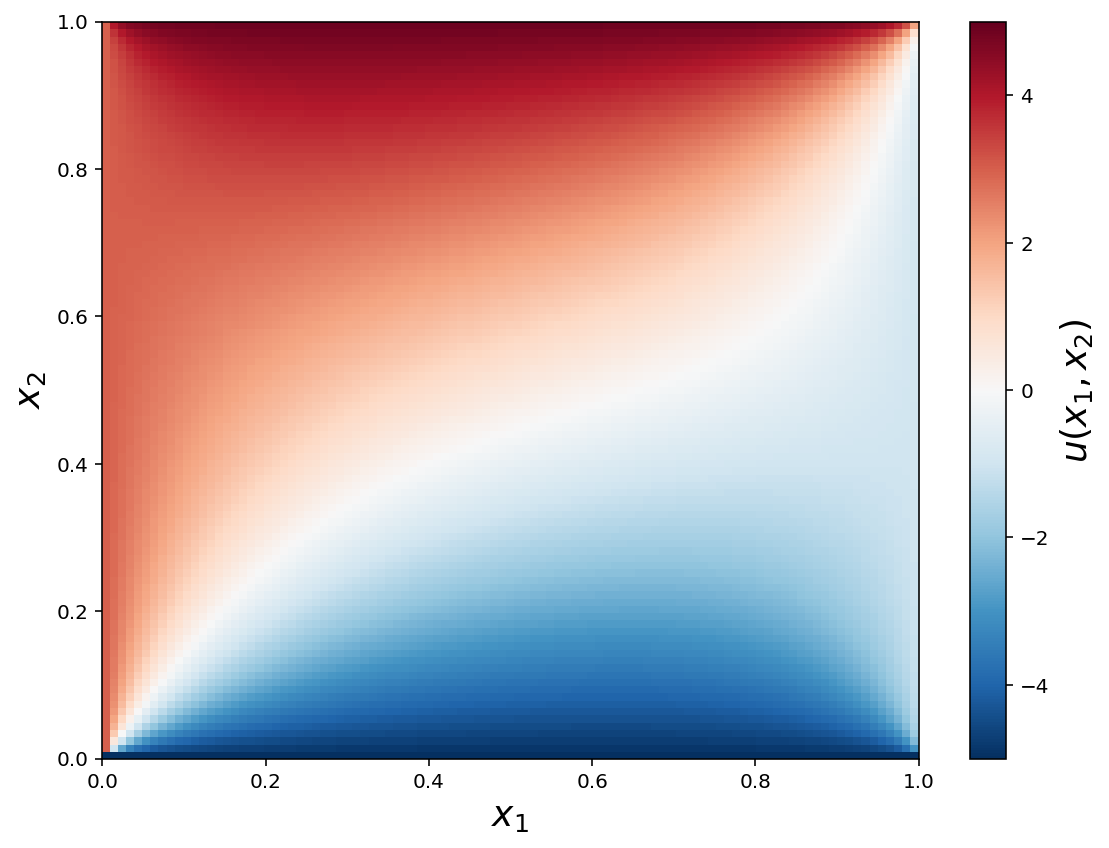

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)

c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=mpl.cm.get_cmap('RdBu_r'))
cb = plt.colorbar(c, ax=ax)

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)
fig.savefig("ch11-fdm-2d.pdf")
fig.tight_layout()

In [37]:
x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)

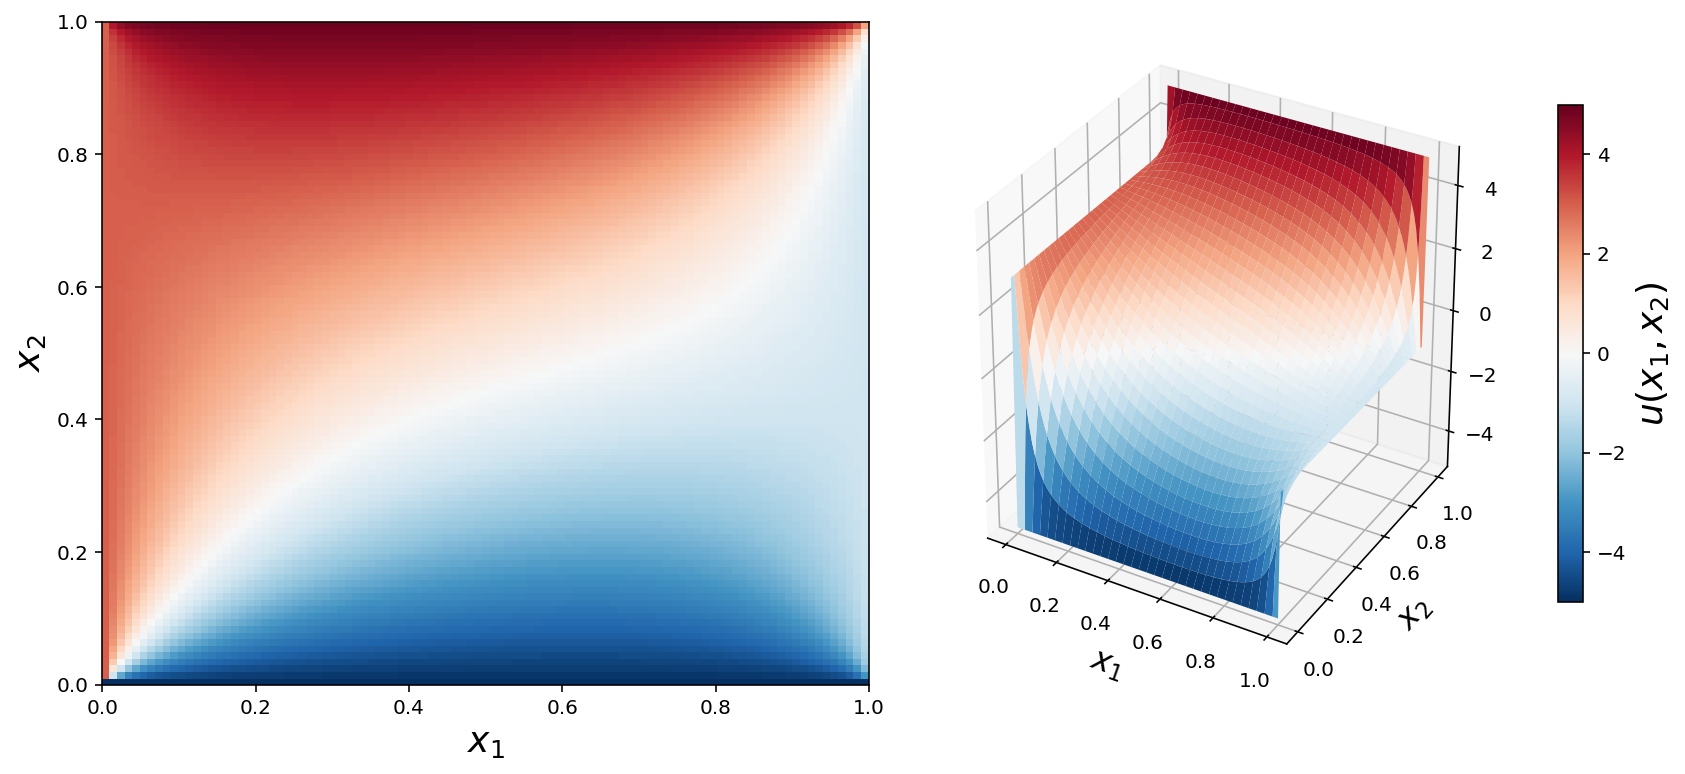

In [38]:
fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('RdBu_r')

ax = fig.add_subplot(1, 2, 1)
p = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3, linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=16)
ax.set_ylabel(r"$x_2$", fontsize=16)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

fig.savefig("ch11-fdm-2d.pdf")
fig.savefig("ch11-fdm-2d.png")
fig.tight_layout()

### Porównanie wydajności: reprezentacja gęsta/rzadka

In [39]:
A_dense = A.todense()

In [40]:
%timeit np.linalg.solve(A_dense, d)

5.4 s ± 206 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%timeit la.solve(A_dense, d)

7.74 s ± 198 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%timeit sp.linalg.spsolve(A, d)

30.6 ms ± 716 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
10.8 / 31.9e-3

338.5579937304076

### Przykład dwuwymiarowy z niezerowym czynnikiem po prawej stronie

In [44]:
d = - np.ones((N, N))
d = d.reshape(N**2)

In [45]:
u = sp.linalg.spsolve(A, d).reshape(N, N)

In [46]:
U = np.vstack([np.zeros((1, N+2)),
               np.hstack([np.zeros((N, 1)), u, np.zeros((N, 1))]),
               np.zeros((1, N+2))])

In [47]:
x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)

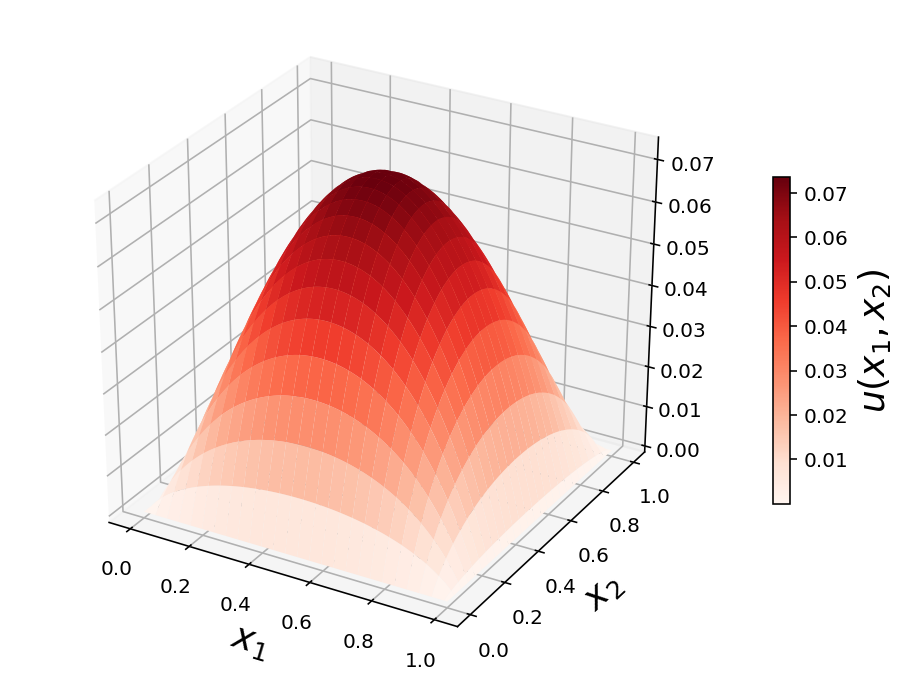

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), subplot_kw={'projection': '3d'})

p = ax.plot_surface(X, Y, U, rstride=4, cstride=4, linewidth=0, cmap=mpl.cm.get_cmap("Reds"))
cb = fig.colorbar(p, shrink=0.5)

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

## FEniCS

In [4]:
import dolfin
import mshr

In [6]:
dolfin.parameters["reorder_dofs_serial"] = False
dolfin.parameters["allow_extrapolation"] = True

In [7]:
N1 = N2 = 75

In [8]:
mesh = dolfin.RectangleMesh(dolfin.Point(0, 0), dolfin.Point(1, 1), N1, N2)

In [9]:
from IPython.display import display

In [10]:
dolfin.RectangleMesh(dolfin.Point(0, 0), dolfin.Point(1, 1), 10, 10)

### Przestrzeń funkcyjna na podstawie siatki

In [11]:
V = dolfin.FunctionSpace(mesh, 'Lagrange', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


### Problem wariacyjny

In [12]:
u = dolfin.TrialFunction(V)

In [13]:
v = dolfin.TestFunction(V)

In [14]:
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx

In [15]:
f1 = dolfin.Constant(1.0)

In [16]:
L1 = f1 * v * dolfin.dx

In [17]:
f2 = dolfin.Constant(1.0)

In [18]:
f2 = dolfin.Expression("x[0]*x[0] + x[1]*x[1]", degree=1)

In [19]:
L2 = f2 * v * dolfin.dx

### Warunki brzegowe

In [20]:
u0 = dolfin.Constant(0)

In [21]:
def u0_boundary(x, on_boundary):
   
    return on_boundary

In [22]:
bc = dolfin.DirichletBC(V, u0, u0_boundary)

### Rozwiązanie problemu

In [23]:
A = dolfin.assemble(a)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/opt/anaconda3/envs/fenicsproject2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [24]:
b = dolfin.assemble(L1)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/opt/anaconda3/envs/fenicsproject2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


In [25]:
bc.apply(A, b)

In [26]:
u_sol1 = dolfin.Function(V)

In [27]:
dolfin.solve(A, u_sol1.vector(), b)

1

In [28]:
u_sol2 = dolfin.Function(V)

In [29]:
dolfin.solve(a == L2, u_sol2, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.


/opt/anaconda3/envs/fenicsproject2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


### Wykres z użyciem dolfin

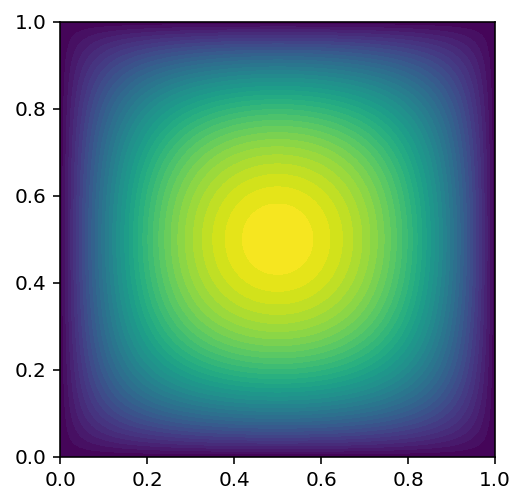

In [30]:
dolfin.plot(u_sol1)
# dolfin.interactive()

### Zapis plików VTK

In [31]:
dolfin.File('u_sol1.pvd') << u_sol1

In [32]:
dolfin.File('u_sol2.pvd') << u_sol2

In [33]:
f = dolfin.File('combined.pvd')
f << mesh
f << u_sol1
f << u_sol2

### Ewaluacja funkcji

In [34]:
u_sol1([0.21, 0.67])

0.04660769977813522

### Otrzymanie tablic NumPy

In [35]:
u_mat1 = np.array(u_sol1.vector()).reshape(N1+1, N2+1)

In [36]:
u_mat2 = np.array(u_sol2.vector()).reshape(N1+1, N2+1)

In [37]:
X, Y = np.meshgrid(np.linspace(0, 1, N1+2), np.linspace(0, 1, N2+2))

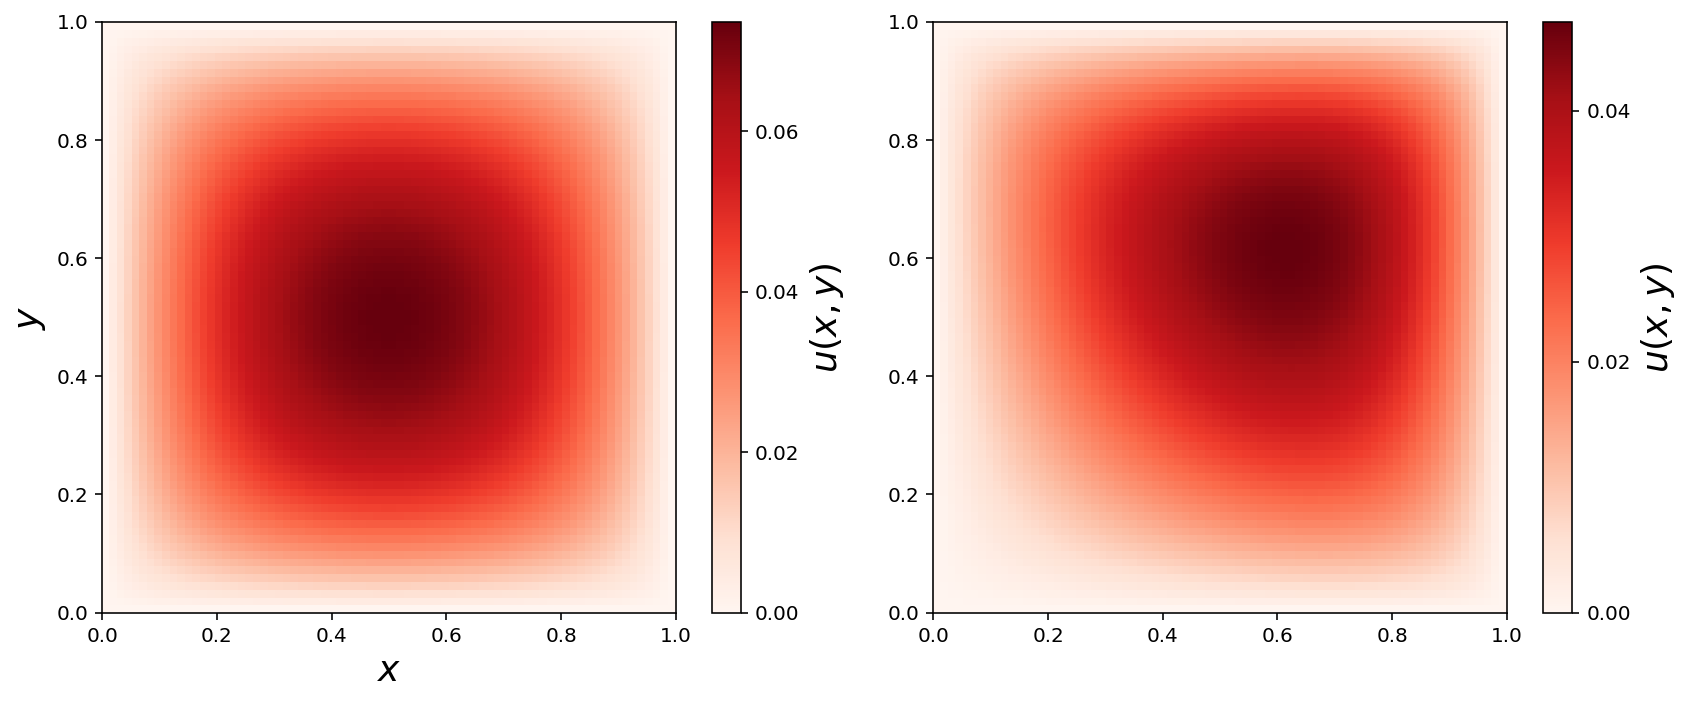

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
cmap = mpl.cm.get_cmap('Reds')

c = ax1.pcolor(X, Y, u_mat1, cmap=cmap)
cb = plt.colorbar(c, ax=ax1)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 0.02, 0.04, 0.06])

c = ax2.pcolor(X, Y, u_mat2, cmap=cmap)
cb = plt.colorbar(c, ax=ax2)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 0.02, 0.04])

fig.savefig("ch11-fdm-2d-ex1.pdf")
fig.savefig("ch11-fdm-2d-ex1.png")
fig.tight_layout()

In [39]:
X, Y = np.meshgrid(np.linspace(0, 1, N1+1), np.linspace(0, 1, N2+1))

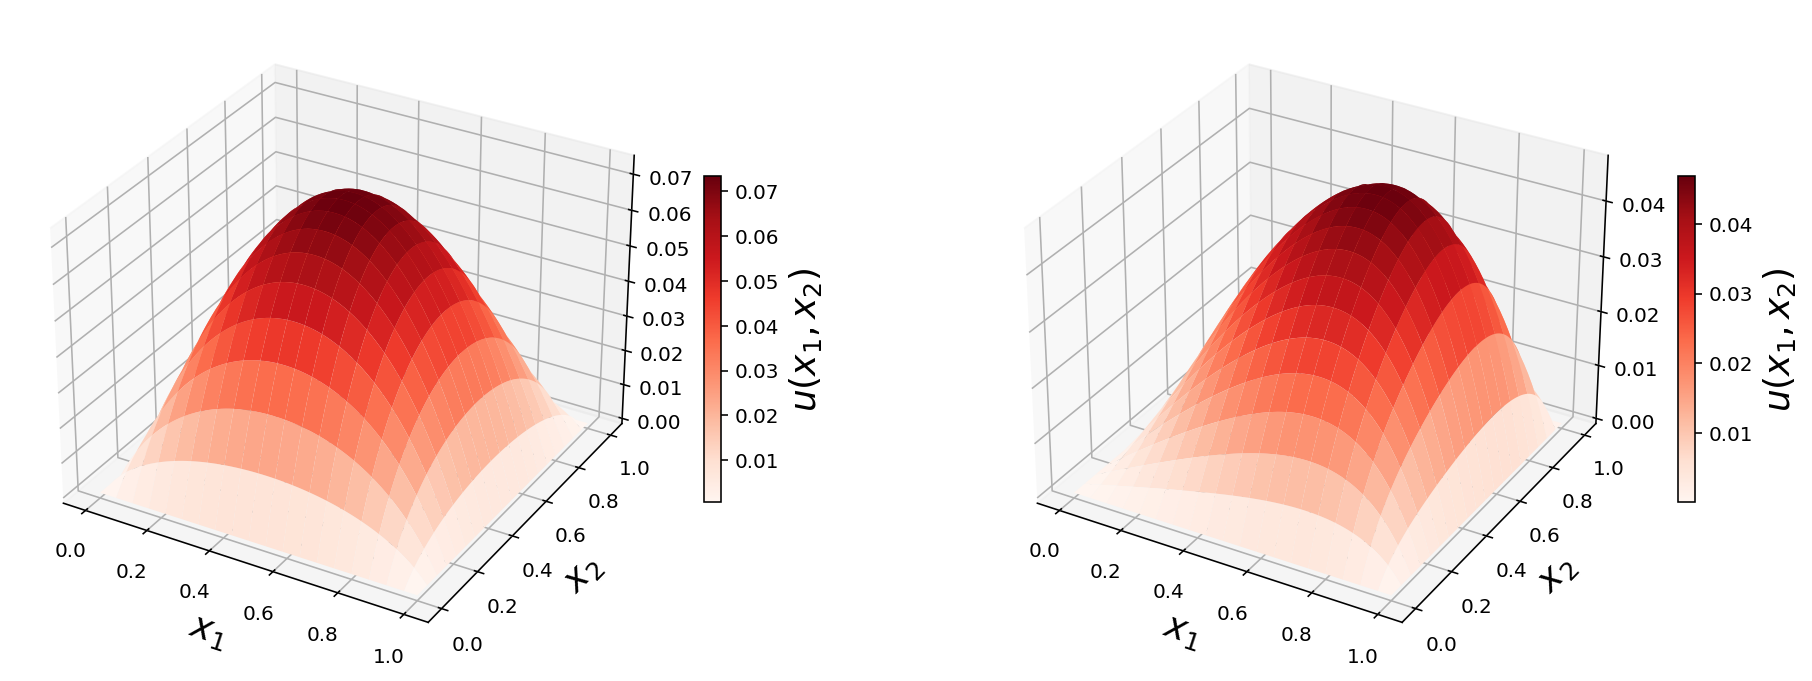

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': '3d'})

p = ax1.plot_surface(X, Y, u_mat1, rstride=4, cstride=4, linewidth=0, cmap=mpl.cm.get_cmap("Reds"))
cb = fig.colorbar(p, ax=ax1, shrink=0.5)
ax1.set_xlabel(r"$x_1$", fontsize=18)
ax1.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

p = ax2.plot_surface(X, Y, u_mat2, rstride=4, cstride=4, linewidth=0, cmap=mpl.cm.get_cmap("Reds"))
cb = fig.colorbar(p, ax=ax2, shrink=0.5)
ax2.set_xlabel(r"$x_1$", fontsize=18)
ax2.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

### Triangulacja

In [41]:
def mesh_triangulation(mesh):
    coordinates = mesh.coordinates()
    triangles = mesh.cells()
    triangulation = mpl.tri.Triangulation(coordinates[:, 0], coordinates[:, 1], triangles)
    return triangulation

In [42]:
triangulation = mesh_triangulation(mesh)

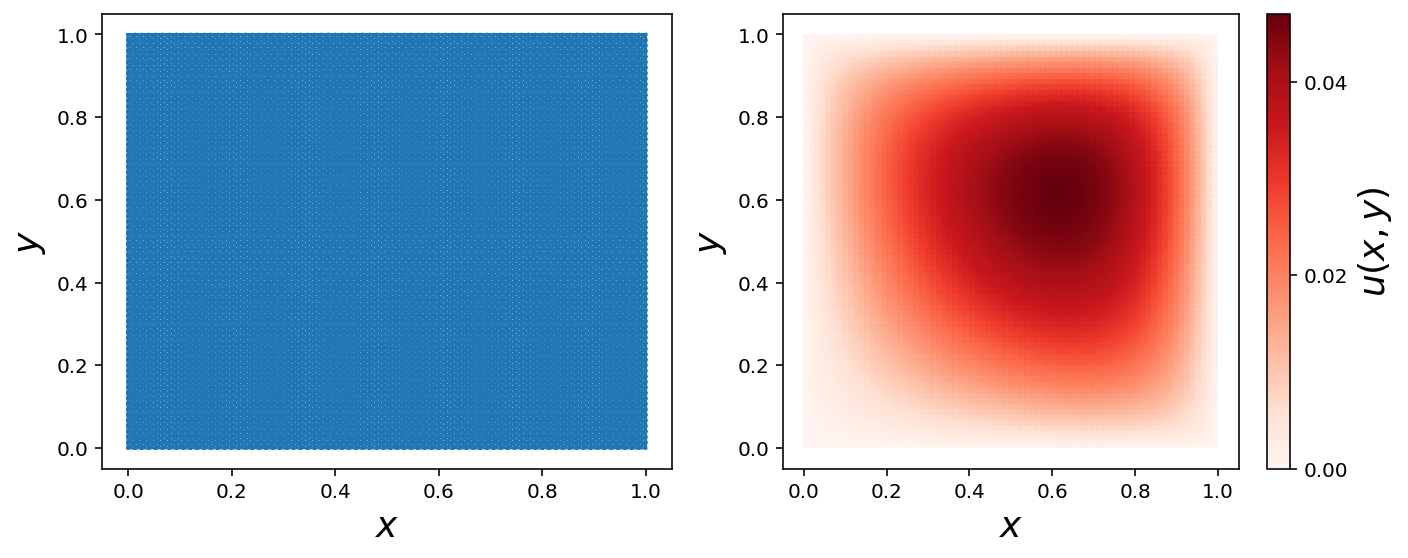

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.triplot(triangulation)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)

c = ax2.tripcolor(triangulation, np.array(u_sol2.vector()), cmap=cmap)
cb = plt.colorbar(c, ax=ax2)
ax2.set_xlabel(r"$x$", fontsize=18)
ax2.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 0.02, 0.04])

fig.savefig("ch11-fdm-2d-ex2.pdf")
fig.savefig("ch11-fdm-2d-ex2.png")
fig.tight_layout()

## Warunki brzegowe Dirichleta

In [44]:
N1 = N2 = 75

In [45]:
mesh = dolfin.RectangleMesh(dolfin.Point(0, 0), dolfin.Point(1, 1), N1, N2)

In [46]:
V = dolfin.FunctionSpace(mesh, 'Lagrange', 1)

In [47]:
u = dolfin.TrialFunction(V)

In [48]:
v = dolfin.TestFunction(V)

In [49]:
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx

In [50]:
f = dolfin.Constant(0.0)

In [51]:
L = f * v * dolfin.dx

In [52]:
def u0_top_boundary(x, on_boundary):
    return on_boundary and abs(x[1]-1) < 1e-8

In [53]:
def u0_bottom_boundary(x, on_boundary):
    return on_boundary and abs(x[1]) < 1e-8

In [54]:
def u0_left_boundary(x, on_boundary):
    return on_boundary and abs(x[0]) < 1e-8

In [55]:
def u0_right_boundary(x, on_boundary):
    return on_boundary and abs(x[0]-1) < 1e-8

In [56]:
bc_t = dolfin.DirichletBC(V, dolfin.Constant(5), u0_top_boundary)
bc_b = dolfin.DirichletBC(V, dolfin.Constant(-5), u0_bottom_boundary)
bc_l = dolfin.DirichletBC(V, dolfin.Constant(3), u0_left_boundary)
bc_r = dolfin.DirichletBC(V, dolfin.Constant(-1), u0_right_boundary)

In [57]:
bcs = [bc_t, bc_b, bc_r, bc_l]

In [58]:
u_sol = dolfin.Function(V)

In [59]:
dolfin.solve(a == L, u_sol, bcs)

In [60]:
u_mat = np.array(u_sol.vector()).reshape(N1+1, N2+1)

In [61]:
x = np.linspace(0, 1, N1+2)
y = np.linspace(0, 1, N1+2)
X, Y = np.meshgrid(x, y)

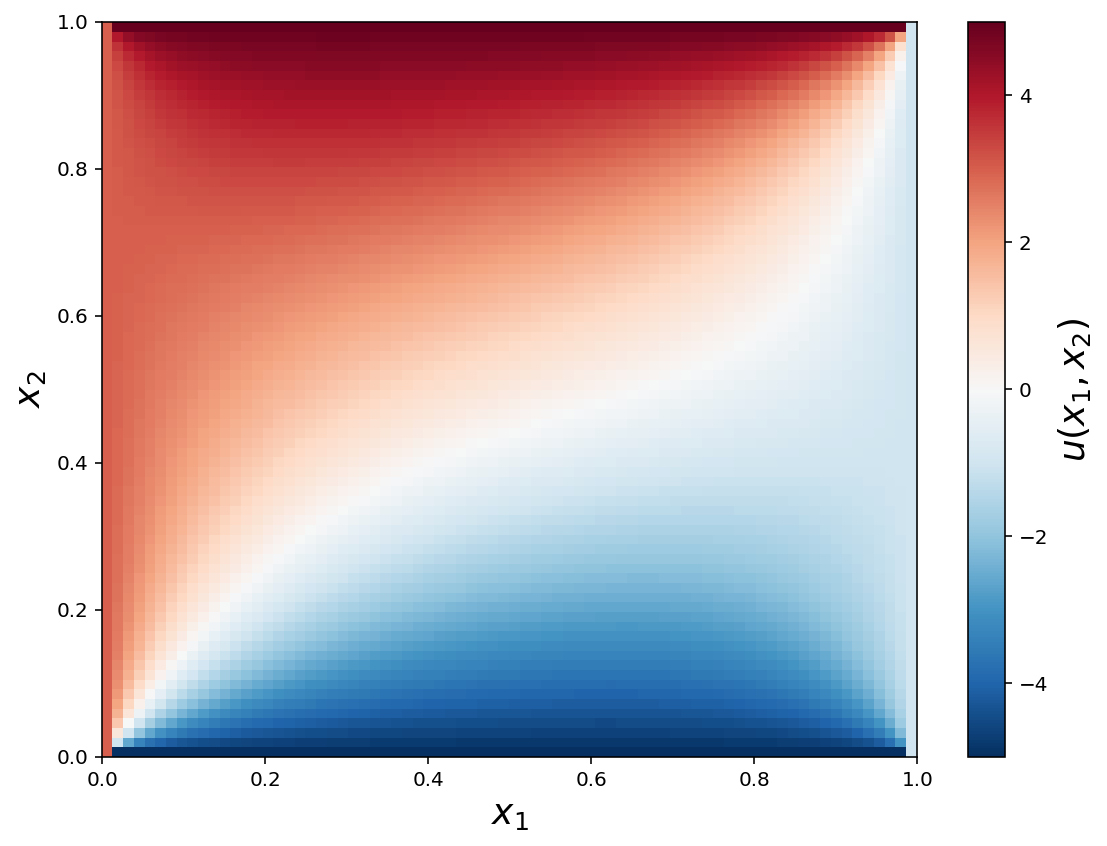

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

c = ax.pcolor(X, Y, u_mat, vmin=-5, vmax=5, cmap=mpl.cm.get_cmap('RdBu_r'))
cb = plt.colorbar(c, ax=ax)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)
fig.savefig("ch11-fdm-2d-ex3.pdf")
fig.savefig("ch11-fdm-2d-ex3.png")
fig.tight_layout()

## Przykład siatki z okręgami

In [63]:
r_outer = 1
r_inner = 0.25
r_middle = 0.1
x0, y0 = 0.4, 0.4

In [64]:
domain = mshr.Circle(dolfin.Point(.0, .0), r_outer) \
    - mshr.Circle(dolfin.Point(.0, .0), r_inner) \
    - mshr.Circle(dolfin.Point( x0,  y0), r_middle) \
    - mshr.Circle(dolfin.Point( x0, -y0), r_middle) \
    - mshr.Circle(dolfin.Point(-x0,  y0), r_middle) \
    - mshr.Circle(dolfin.Point(-x0, -y0), r_middle)

In [65]:
mesh = mshr.generate_mesh(domain, 10)

In [66]:
mesh

In [67]:
V = dolfin.FunctionSpace(mesh, 'Lagrange', 1)

In [68]:
u = dolfin.TrialFunction(V)

In [69]:
v = dolfin.TestFunction(V)

In [70]:
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx

In [71]:
f = dolfin.Constant(1.0)

In [72]:
L = f * v * dolfin.dx

In [73]:
def u0_outer_boundary(x, on_boundary):
    x, y = x[0], x[1]
    return on_boundary and abs(np.sqrt(x**2 + y**2) - r_outer) < 5e-2

In [74]:
def u0_inner_boundary(x, on_boundary):
    x, y = x[0], x[1]
    return on_boundary and abs(np.sqrt(x**2 + y**2) - r_inner) < 5e-2

In [75]:
def u0_middle_boundary(x, on_boundary):
    x, y = x[0], x[1]
    if on_boundary:
        for _x0 in [-x0, x0]:
            for _y0 in [-y0, y0]:
                if abs(np.sqrt((x+_x0)**2 + (y+_y0)**2) - r_middle) < 5e-2:
                    return True
    
    return False

In [76]:
bc_inner = dolfin.DirichletBC(V, dolfin.Constant(15), u0_inner_boundary)
bc_middle = dolfin.DirichletBC(V, dolfin.Constant(0), u0_middle_boundary)

In [77]:
bcs = [bc_inner, bc_middle]

In [78]:
u_sol = dolfin.Function(V)

In [79]:
dolfin.solve(a == L, u_sol, bcs)

In [80]:
triangulation = mesh_triangulation(mesh)

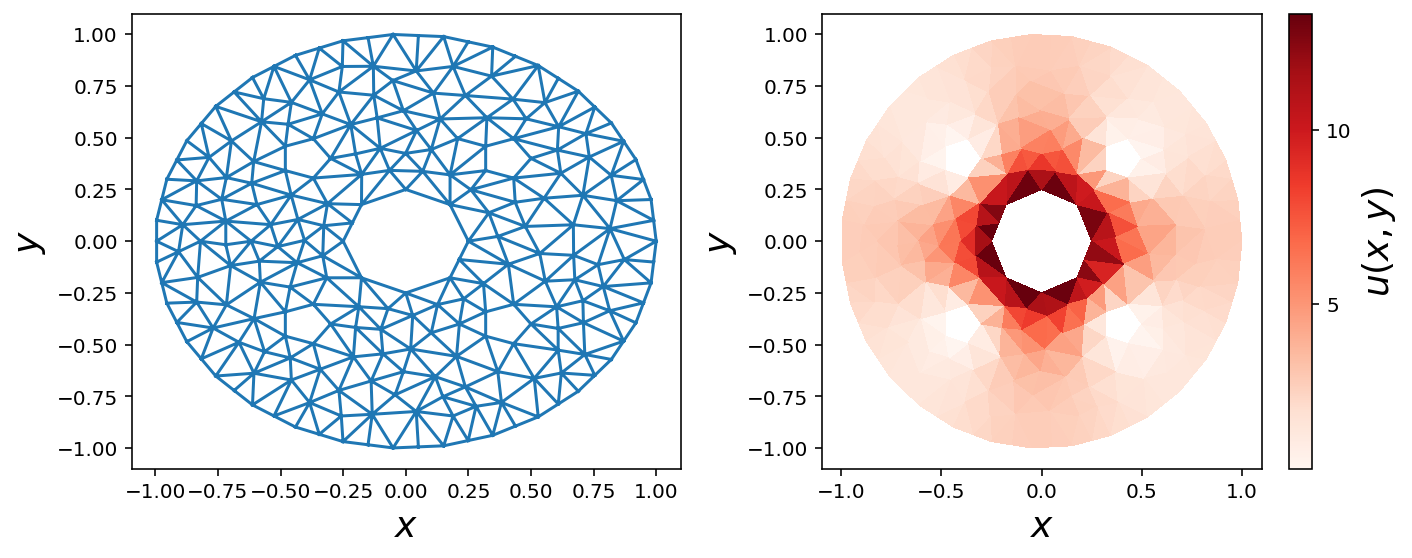

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.triplot(triangulation)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)

c = ax2.tripcolor(triangulation, np.array(u_sol.vector()), cmap=mpl.cm.get_cmap("Reds"))
cb = plt.colorbar(c, ax=ax2)
ax2.set_xlabel(r"$x$", fontsize=18)
ax2.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 5, 10, 15])

fig.savefig("ch11-fdm-2d-ex4.pdf")
fig.savefig("ch11-fdm-2d-ex4.png")
fig.tight_layout()

### Dalsze przetwarzanie wyników

In [82]:
outer_boundary = dolfin.AutoSubDomain(lambda x, on_bnd: on_bnd and abs(np.sqrt(x[0]**2 + x[1]**2) - r_outer) < 5e-2)

In [83]:
bc_outer = dolfin.DirichletBC(V, 1, outer_boundary)

In [84]:
mask_outer = dolfin.Function(V)

In [85]:
bc_outer.apply(mask_outer.vector())

In [86]:
u_outer = u_sol.vector()[mask_outer.vector() == 1]

In [87]:
numpy
scipy
sympy
matplotlib
pandas
cvxopt
networkx
ipykernel
notebookx_outer = mesh.coordinates()[mask_outer.vector() == 1]

In [88]:
phi = np.angle(x_outer[:, 0] + 1j * x_outer[:, 1])

In [89]:
order = np.argsort(phi)

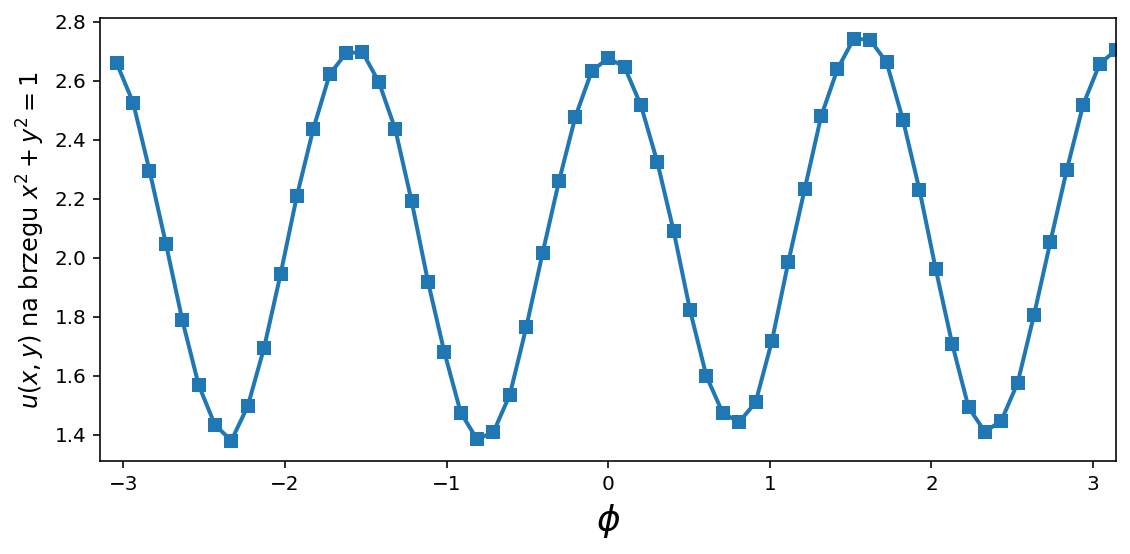

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(phi[order], u_outer[order], 's-', lw=2)
ax.set_ylabel(r"$u(x,y)$ na brzegu $x^2+y^2=1$", fontsize=12)
ax.set_xlabel(r"$\phi$", fontsize=18)
ax.set_xlim(-np.pi, np.pi)
fig.tight_layout()
fig.savefig("ch11-fem-2d-ex5.pdf")

## Udoskonalanie siatki

In [91]:
domain = mshr.Circle(dolfin.Point(.0, .0), 1.0) - mshr.Rectangle(dolfin.Point(0.0, -1.0), dolfin.Point(1.0, 0.0))

In [92]:
mesh = mshr.generate_mesh(domain, 10)

In [93]:
refined_mesh = mesh
for r in [0.5, 0.25]:
    cell_markers = dolfin.MeshFunction("bool", refined_mesh, 2)
    cell_markers.set_all(False)
    for cell in dolfin.cells(refined_mesh):
        if cell.distance(dolfin.Point(.0, .0)) < r:
            # Oznaczam komórki w promieniu r jako komórki do podziału
            cell_markers[cell] = True
    refined_mesh = dolfin.refine(refined_mesh, cell_markers)

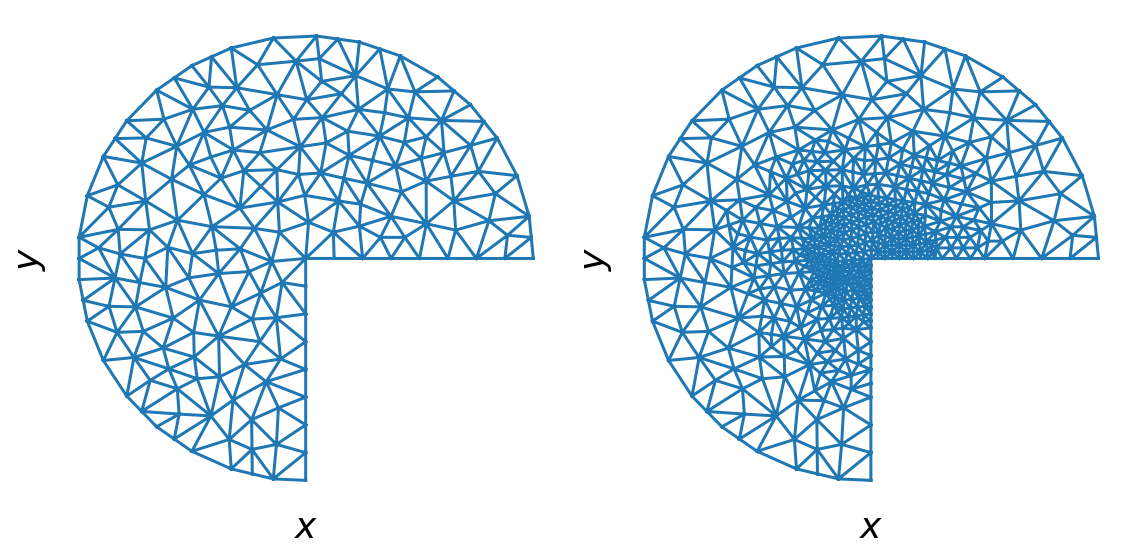

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
 
ax1.triplot(mesh_triangulation(mesh))
ax2.triplot(mesh_triangulation(refined_mesh))

for ax in [ax1, ax2]:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
 
fig.savefig("ch11-fem-2d-mesh-refine.pdf")
fig.savefig("ch11-fem-2d-mesh-refine.png")
fig.tight_layout()

In [95]:
refined_mesh.topology().dim()-1

1

### Ulepszona siatka z warunkami brzegowymi  Dirichleta

In [96]:
mesh = refined_mesh

In [97]:
V = dolfin.FunctionSpace(mesh, 'Lagrange', 1)

In [98]:
u = dolfin.TrialFunction(V)

In [99]:
v = dolfin.TestFunction(V)

In [100]:
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx

In [101]:
f = dolfin.Constant(0.0)

In [102]:
L = f * v * dolfin.dx

In [103]:
def u0_vertical_boundary(x, on_boundary):
    x, y = x[0], x[1]
    return on_boundary and abs(x) < 1e-2 and y < 0.0

In [104]:
def u0_horizontal_boundary(x, on_boundary):
    x, y = x[0], x[1]
    return on_boundary and abs(y) < 1e-2 and x > 0.0

In [105]:
bc_vertical = dolfin.DirichletBC(V, dolfin.Constant(-5), u0_vertical_boundary)

In [106]:
bc_horizontal = dolfin.DirichletBC(V, dolfin.Constant(5), u0_horizontal_boundary)

In [107]:
bcs = [bc_vertical, bc_horizontal]

In [108]:
u_sol = dolfin.Function(V)

In [109]:
dolfin.solve(a == L, u_sol, bcs)

In [110]:
triangulation = mesh_triangulation(mesh)

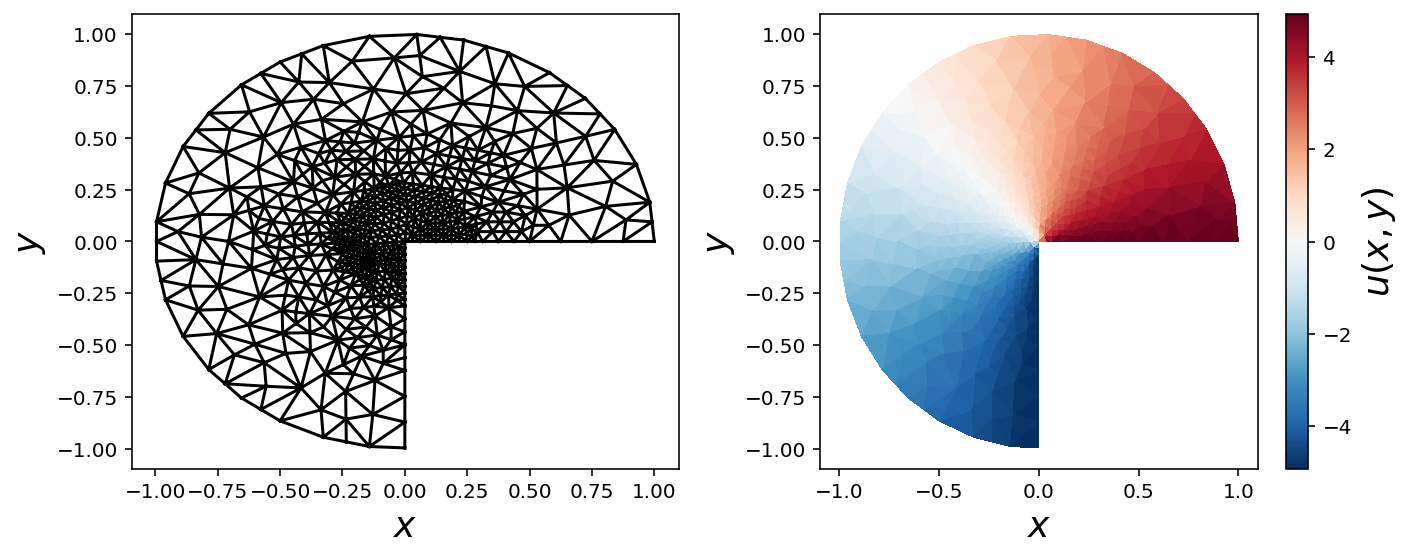

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
 
ax1.triplot(triangulation, color='k')
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)
 
c = ax2.tripcolor(triangulation, np.array(u_sol.vector()), cmap=mpl.cm.get_cmap("RdBu_r"))
cb = plt.colorbar(c, ax=ax2)
ax2.set_xlabel(r"$x$", fontsize=18)
ax2.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)

fig.tight_layout()

## Ulepszona siatka z warunkami brzegowymi Dirichlet i Neumann

In [112]:
mesh = refined_mesh

In [113]:
V = dolfin.FunctionSpace(mesh, 'Lagrange', 1)

In [114]:
u = dolfin.TrialFunction(V)

In [115]:
v = dolfin.TestFunction(V)

In [116]:
boundary_parts = dolfin.MeshFunction("size_t", mesh, mesh.topology().dim()-1)

In [117]:
def v_boundary_func(x, on_boundary):
    """ Wierzchołki pionowe siatki (x = 0 i y < 0) """
    x, y = x[0], x[1]
    return on_boundary and abs(x) < 1e-4 and y < 0.0

In [118]:
v_boundary = dolfin.AutoSubDomain(v_boundary_func)

In [119]:
v_boundary.mark(boundary_parts, 0)

In [120]:
def h_boundary_func(x, on_boundary):
    """ Wierzchołki poziome siatki (y = 0 i x > 0)"""
    x, y = x[0], x[1]
    return on_boundary and abs(y) < 1e-4 and x > 0.0

In [121]:
h_boundary = dolfin.AutoSubDomain(h_boundary_func)

In [122]:
h_boundary.mark(boundary_parts, 1)

In [123]:
def outer_boundary_func(x, on_boundary):
    x, y = x[0], x[1]
    return on_boundary and abs(x**2 + y**2-1) < 1e-2

In [124]:
outer_boundary = dolfin.AutoSubDomain(outer_boundary_func)

In [125]:
outer_boundary.mark(boundary_parts, 2)

In [126]:
bc = dolfin.DirichletBC(V, dolfin.Constant(0.0), boundary_parts, 2)

In [127]:
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx(domain=mesh, subdomain_data=boundary_parts)

In [128]:
f = dolfin.Constant(0.0)

In [129]:
g_v = dolfin.Constant(-2.0)

In [130]:
g_h = dolfin.Constant(1.0)

In [131]:
L = f * v * dolfin.dx(domain=mesh, subdomain_data=boundary_parts)

In [132]:
L += g_v * v * dolfin.ds(0, domain=mesh, subdomain_data=boundary_parts)

In [133]:
L += g_h * v * dolfin.ds(1, domain=mesh, subdomain_data=boundary_parts)

In [134]:
u_sol = dolfin.Function(V)

In [135]:
dolfin.solve(a == L, u_sol, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.


/opt/anaconda3/envs/fenicsproject2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


In [136]:
triangulation = mesh_triangulation(mesh)

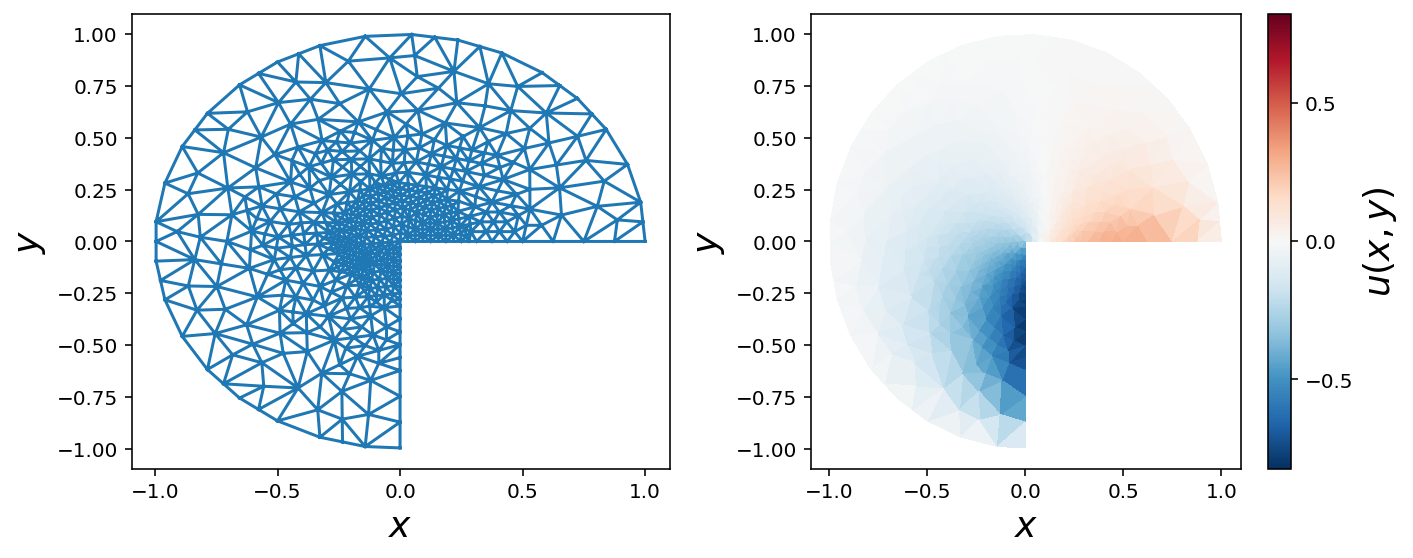

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
 
ax1.triplot(triangulation)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)
 
data = np.array(u_sol.vector())
norm = mpl.colors.Normalize(-abs(data).max(), abs(data).max())
c = ax2.tripcolor(triangulation, data, norm=norm, cmap=mpl.cm.get_cmap("RdBu_r"))
cb = plt.colorbar(c, ax=ax2)
ax2.set_xlabel(r"$x$", fontsize=18)
ax2.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([-.5, 0, .5])
 
fig.savefig("ch11-fem-2d-ex5.pdf")
fig.savefig("ch11-fem-2d-ex5.png")
fig.tight_layout()